In [1]:
#Kütüphane yüklemeleri
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras_tuner as kt
from sklearn.metrics import classification_report
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [2]:
#Veri setinin yolu bildirilioyr ve sınıf bilgileri içeri aktarılıyor
path = "C:\\Users\\Tao\\Downloads\\archive\\Train\\"
df_classes = pd.read_csv(r"C:\Users\Tao\Downloads\archive\Classes.csv",sep=";")
data = []
labels = []
classes = len(df_classes)


In [3]:
#Veri seti içeri aktarıldı
for i in range(classes):
    img_path = os.path.join(path,str(i)) 
    for img in os.listdir(img_path):
        im = Image.open(img_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data.append(im)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
data.shape

(39209, 32, 32, 3)

                        ClassName  Freq
0                     Ahead only   1200
1              Beware of ice/snow   450
2              Bicycles crossing    270
3                     Bumpy road    390
4              Children crossing    540
5           Dangerous curve left    210
6          Dangerous curve right    360
7                   Double curve    330
8   End no passing veh > 3.5 tons   240
9              End of no passing    240
10   End of speed limit (80km/h)    420
11    End speed + passing limits    240
12               General caution   1200
13           Go straight or left    210
14          Go straight or right    390
15                     Keep left    300
16                    Keep right   2070
17                      No entry   1110
18                    No passing   1470
19  No passing veh over 3.5 tons   2010
20                   No vehicles    630
21                   Pedestrians    240
22                 Priority road   2100
23  Right-of-way at intersection   1320


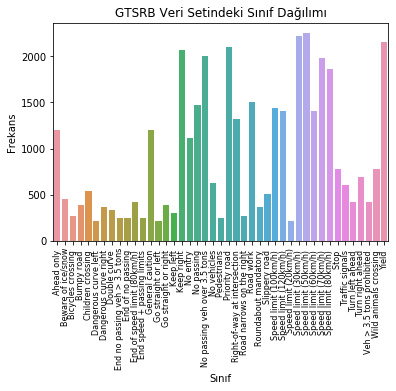

In [4]:
#Sınıf dağılımı görselleştirildi ve frekans tablosu oluşturuldu
df1 = pd.DataFrame(labels,columns=["ClassId"])
class_join = pd.merge(df1,  
                      df_classes,  
                      on ='ClassId',  
                      how ='inner') 

class_grouped=class_join.groupby('ClassName')['ClassId'].count().to_frame().reset_index()
class_grouped=pd.DataFrame(class_grouped)
class_grouped=class_grouped.rename(columns={"ClassName": "ClassName", "ClassId": "Freq"})
print(class_grouped)

# Seaborn ile sınıf dağılım grafiği çizdirildi
sns.barplot(x=class_grouped['ClassName'], y=class_grouped['Freq'])
plt.xlabel('Sınıf')
plt.xticks(rotation='vertical',fontsize=8)
plt.ylabel('Frekans')
plt.title('GTSRB Veri Setindeki Sınıf Dağılımı')
plt.show()

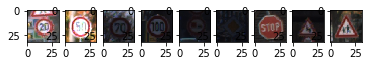

In [5]:
#Veri setinden örnekler görsel olarak gösterildi

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 9)
ax1.imshow(data[1])
ax2.imshow(data[3000])
ax3.imshow(data[7001])
ax4.imshow(data[11000])
ax5.imshow(data[15000])
ax6.imshow(data[19000])
ax7.imshow(data[23000])
ax8.imshow(data[27000])
ax9.imshow(data[31000])


In [7]:
#x değişkeni veri  tipi değiştirildi , y değişkenindeki sınıf bilgileri kategorik yapıya dönüştürüldü
x = data.astype('float32')
y = keras.utils.to_categorical(np.array(labels))

In [8]:
for i in range(len(x)):
    for a in range(31):
        x[i][a]= MinMaxScaler().fit_transform(x[i][a])

In [9]:
#Eğitim,Test ve Validasyon veri setleri oluşturuldu
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, shuffle=True,stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_val,y_val, test_size=0.5, shuffle=True)


C:\Users\Tao\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\Tao\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

In [10]:
#Model yapısı kuruldu
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(43, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 batch_normalization (BatchN  (None, 3072)             12288     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                        

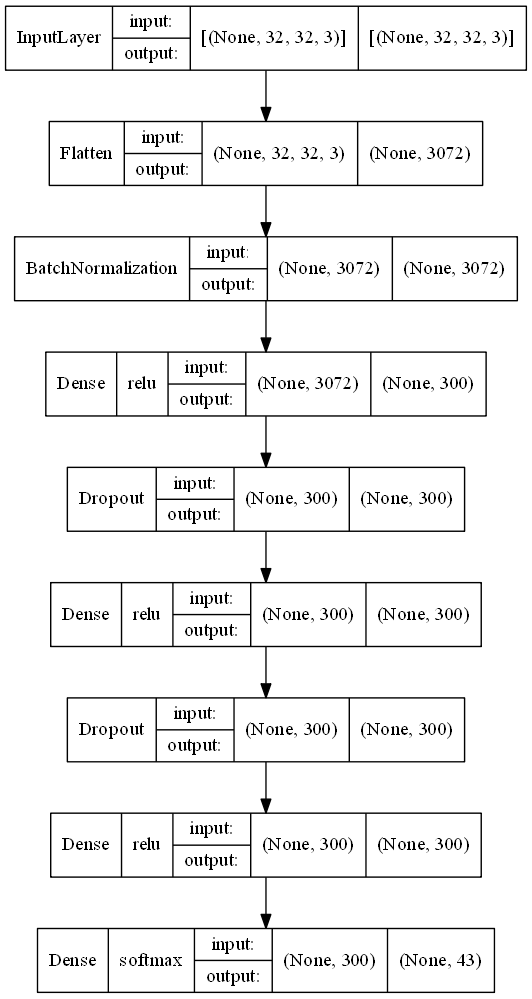

In [11]:
#Model görselleştirildi
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=False,
    dpi=100,
    show_layer_activations=True
)


In [12]:
#Model compile edildi
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#Model eğitimi yapıldı
history= model.fit(x_train,y_train, epochs=100, batch_size=32,validation_data=(x_val,y_val))

Epoch 1/100
981/981 [==============================] - 8s 8ms/step - loss: 2.1676 - accuracy: 0.4029 - val_loss: 0.9278 - val_accuracy: 0.7320
Epoch 2/100
981/981 [==============================] - 7s 7ms/step - loss: 1.0584 - accuracy: 0.6736 - val_loss: 0.5136 - val_accuracy: 0.8495
Epoch 3/100
981/981 [==============================] - 7s 7ms/step - loss: 0.7697 - accuracy: 0.7588 - val_loss: 0.3791 - val_accuracy: 0.8931
Epoch 4/100
981/981 [==============================] - 7s 7ms/step - loss: 0.6265 - accuracy: 0.8046 - val_loss: 0.3112 - val_accuracy: 0.9087
Epoch 5/100
981/981 [==============================] - 7s 7ms/step - loss: 0.5407 - accuracy: 0.8305 - val_loss: 0.3041 - val_accuracy: 0.9084
Epoch 6/100
981/981 [==============================] - 7s 7ms/step - loss: 0.4861 - accuracy: 0.8475 - val_loss: 0.2680 - val_accuracy: 0.9232
Epoch 7/100
981/981 [==============================] - 7s 7ms/step - loss: 0.4378 - accuracy: 0.8625 - val_loss: 0.2498 - val_accuracy: 0.9248

Epoch 58/100
981/981 [==============================] - 9s 9ms/step - loss: 0.0754 - accuracy: 0.9757 - val_loss: 0.0999 - val_accuracy: 0.9712
Epoch 59/100
981/981 [==============================] - 10s 10ms/step - loss: 0.0790 - accuracy: 0.9745 - val_loss: 0.1057 - val_accuracy: 0.9681
Epoch 60/100
981/981 [==============================] - 11s 11ms/step - loss: 0.0818 - accuracy: 0.9742 - val_loss: 0.0945 - val_accuracy: 0.9755
Epoch 61/100
981/981 [==============================] - 9s 9ms/step - loss: 0.0750 - accuracy: 0.9754 - val_loss: 0.0886 - val_accuracy: 0.9758
Epoch 62/100
981/981 [==============================] - 9s 9ms/step - loss: 0.0721 - accuracy: 0.9767 - val_loss: 0.0998 - val_accuracy: 0.9730
Epoch 63/100
981/981 [==============================] - 9s 9ms/step - loss: 0.0724 - accuracy: 0.9758 - val_loss: 0.0903 - val_accuracy: 0.9745
Epoch 64/100
981/981 [==============================] - 8s 9ms/step - loss: 0.0732 - accuracy: 0.9761 - val_loss: 0.0900 - val_accur

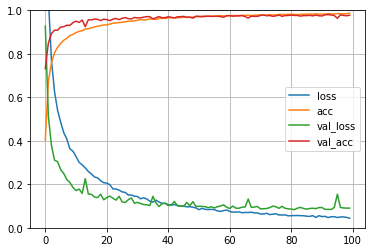

In [14]:

a=pd.DataFrame(history.history)

plt.plot(a)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(["loss","acc","val_loss","val_acc"])


In [15]:

y_pred =np.argmax( model.predict(x_test),axis=1)
y_pred
np.argmax(y_test,axis=1)
print('- Test set accuracy: {:.2f}%\n- Training accuracy: {:.2f}%\n- Validation accuracy: {:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))



- Test set accuracy: 97.25%
- Training accuracy: 98.68%
- Validation accuracy: 97.76%


In [24]:

print(classification_report(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        28
           1       0.97      0.97      0.97       230
           2       0.95      0.95      0.95       223
           3       0.97      0.94      0.96       140
           4       0.94      0.96      0.95       183
           5       0.92      0.93      0.93       167
           6       0.98      1.00      0.99        47
           7       0.98      0.97      0.98       151
           8       0.96      0.96      0.96       142
           9       0.97      0.98      0.97       154
          10       1.00      0.99      0.99       213
          11       0.97      0.99      0.98       124
          12       1.00      1.00      1.00       201
          13       1.00      0.99      0.99       221
          14       0.97      0.99      0.98        77
          15       0.94      0.91      0.92        67
          16       1.00      1.00      1.00        37
          17       0.98    

Text(0.5, 1, 'Confusion Matrix')

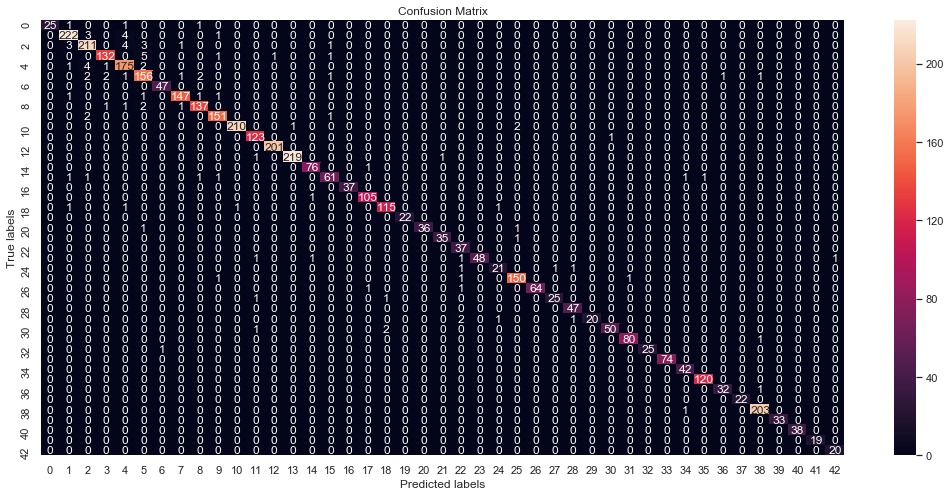

In [16]:


cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


In [17]:
#Model yapısı
def build_model(hp):
    n_hidden=hp.Int("n_hidden",min_value=0,max_value=5,default=2)
    n_neurons=hp.Int("n_neurons",min_value=200,max_value=500)
    learning_rate=hp.Float("learning_rate",min_value="1e-3",max_value="1e-2", sampling="log")
    optimizer=hp.Choice("optimizer",values=["sgd","adam"])
    if optimizer=="sgd":
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model=tf.keras.Sequential()
    model.add(keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
    #model.add(tf.keras.layers.Dense(500, activation="relu"))
    for _ in range(n_hidden):
        #model.add(keras.layers.Dropout(0.4))
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))        
    model.add(tf.keras.layers.Dense(43, activation="softmax"))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    return model

In [25]:
#Hiper-parametre GRidSearch
grid_search_tuner=kt.GridSearch(
        build_model,
        objective="val_accuracy",
        max_trials=5,
        overwrite=True,
        seed=42)
grid_search_tuner.search(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))


Trial 5 Complete [00h 01m 02s]
val_accuracy: 0.2030094414949417

Best val_accuracy So Far: 0.8969650864601135
Total elapsed time: 00h 05m 25s


In [26]:
#En iyi parametre

best_models = grid_search_tuner.get_best_models(num_models=1)
model_p=best_models[0]
best_parameters=grid_search_tuner.get_best_hyperparameters(num_trials=1)
best_parameters[0].values


{'n_hidden': 2, 'n_neurons': 200, 'learning_rate': 0.001, 'optimizer': 'adam'}

In [31]:
model_p.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 43)                8643      
                                                                 
Total params: 663,455
Trainable params: 663,449
Non-trainable params: 6
__________________________________________________

In [27]:

history_p= model_p.fit(x_train,y_train, epochs=100, batch_size=32,validation_data=(x_val,y_val))


Epoch 1/100
981/981 [==============================] - 7s 7ms/step - loss: 0.2813 - accuracy: 0.9133 - val_loss: 0.3021 - val_accuracy: 0.9146
Epoch 2/100
981/981 [==============================] - 7s 7ms/step - loss: 0.2675 - accuracy: 0.9185 - val_loss: 0.2779 - val_accuracy: 0.9176
Epoch 3/100
981/981 [==============================] - 7s 7ms/step - loss: 0.2456 - accuracy: 0.9240 - val_loss: 0.3391 - val_accuracy: 0.8980
Epoch 4/100
981/981 [==============================] - 7s 7ms/step - loss: 0.2377 - accuracy: 0.9256 - val_loss: 0.2986 - val_accuracy: 0.9095
Epoch 5/100
981/981 [==============================] - 7s 7ms/step - loss: 0.2184 - accuracy: 0.9327 - val_loss: 0.2907 - val_accuracy: 0.9105
Epoch 6/100
981/981 [==============================] - 7s 7ms/step - loss: 0.2029 - accuracy: 0.9358 - val_loss: 0.3354 - val_accuracy: 0.8952
Epoch 7/100
981/981 [==============================] - 7s 7ms/step - loss: 0.2050 - accuracy: 0.9355 - val_loss: 0.2503 - val_accuracy: 0.9268

Epoch 58/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0559 - accuracy: 0.9823 - val_loss: 0.4177 - val_accuracy: 0.9128
Epoch 59/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0668 - accuracy: 0.9794 - val_loss: 0.2475 - val_accuracy: 0.9431
Epoch 60/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0541 - accuracy: 0.9829 - val_loss: 0.4657 - val_accuracy: 0.9102
Epoch 61/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0605 - accuracy: 0.9818 - val_loss: 0.2912 - val_accuracy: 0.9396
Epoch 62/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0708 - accuracy: 0.9781 - val_loss: 0.2667 - val_accuracy: 0.9419
Epoch 63/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0535 - accuracy: 0.9825 - val_loss: 0.3560 - val_accuracy: 0.9322
Epoch 64/100
981/981 [==============================] - 7s 7ms/step - loss: 0.0647 - accuracy: 0.9799 - val_loss: 0.2208 - val_accuracy:

In [28]:

y_pred_p =np.argmax( model_p.predict(x_test),axis=1)
print(classification_report(np.argmax(y_test,axis=1), y_pred_p))
print('- Test set accuracy: {:.2f}%\n- Training accuracy: {:.2f}%\n- Validation accuracy: {:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_p)*100,(history_p.history['accuracy'][-1])*100,(history_p.history['val_accuracy'][-1])*100))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        28
           1       0.94      0.93      0.93       230
           2       0.88      0.92      0.90       223
           3       0.89      0.89      0.89       140
           4       0.97      0.93      0.95       183
           5       0.91      0.89      0.90       167
           6       0.94      0.98      0.96        47
           7       0.89      0.93      0.91       151
           8       0.93      0.95      0.94       142
           9       0.93      0.97      0.95       154
          10       0.99      0.96      0.97       213
          11       0.97      0.93      0.95       124
          12       0.97      0.98      0.97       201
          13       0.97      0.99      0.98       221
          14       1.00      0.95      0.97        77
          15       0.94      0.90      0.92        67
          16       1.00      1.00      1.00        37
          17       1.00    

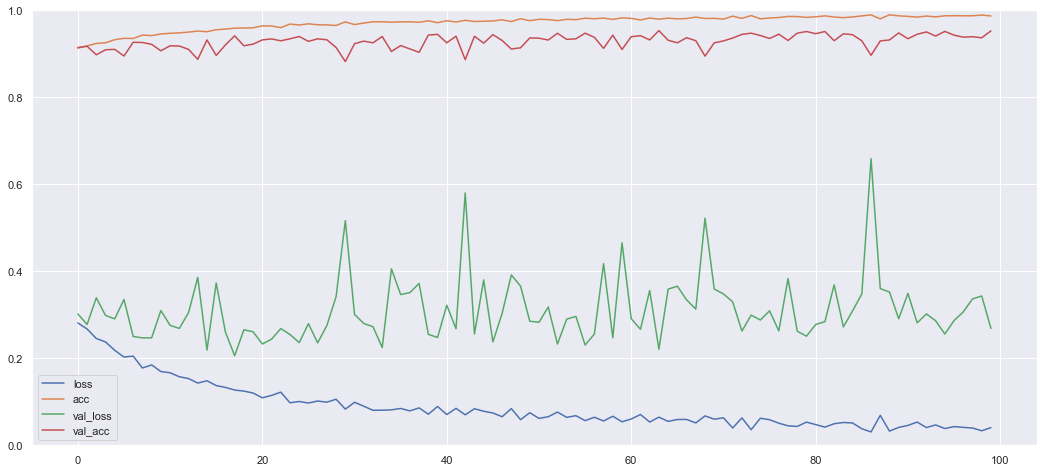

In [29]:

b=pd.DataFrame(history_p.history)

plt.plot(b)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(["loss","acc","val_loss","val_acc"])

Text(0.5, 1, 'Confusion Matrix')

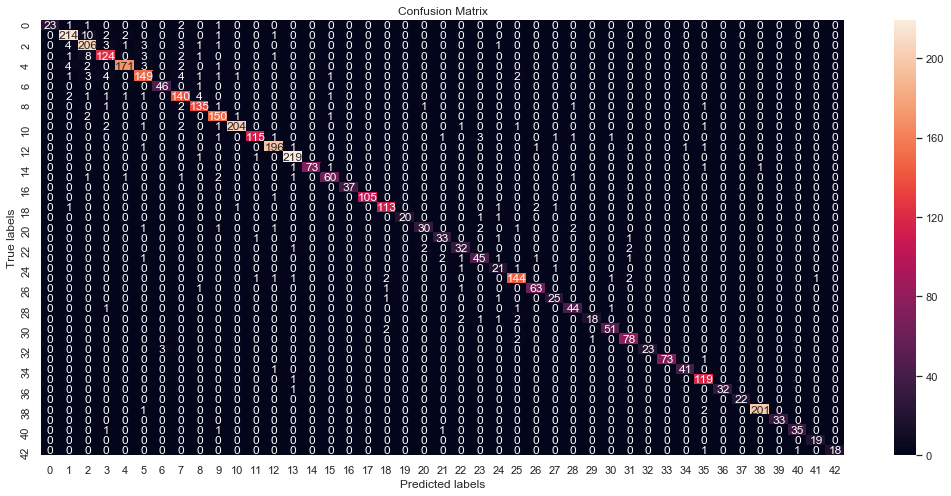

In [30]:


cm_p = confusion_matrix(np.argmax(y_test,axis=1), y_pred_p)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm_p, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


In [56]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)
    
import pandas as pd
import numpy as np
#X = np.load('C:/Users/Gokalp/Desktop/YSA/W5/k49-train-imgs.npz')['arr_0']
#y = np.load('C:/Users/Gokalp/Desktop/YSA/W5/k49-train-labels.npz')['arr_0']
#y = (y <= 25).astype(int)

from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(RBFLayer(200, 0.1))
model.add(Dense(43, activation='softmax', name='foo'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history_r=model.fit(x_train, y_train, batch_size=128, epochs=3,validation_data=(x_val,y_val))


Epoch 1/3
246/246 [==============================] - 97s 392ms/step - loss: 3.7030 - accuracy: 0.0535 - val_loss: 3.6507 - val_accuracy: 0.0579
Epoch 2/3
246/246 [==============================] - 93s 379ms/step - loss: 3.6160 - accuracy: 0.0574 - val_loss: 3.5818 - val_accuracy: 0.0579
Epoch 3/3
246/246 [==============================] - 92s 376ms/step - loss: 3.5627 - accuracy: 0.0574 - val_loss: 3.5400 - val_accuracy: 0.0579


In [57]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 rbf_layer_7 (RBFLayer)      (None, 200)               614400    
                                                                 
 foo (Dense)                 (None, 43)                8643      
                                                                 
Total params: 623,043
Trainable params: 623,043
Non-trainable params: 0
_________________________________________________________________


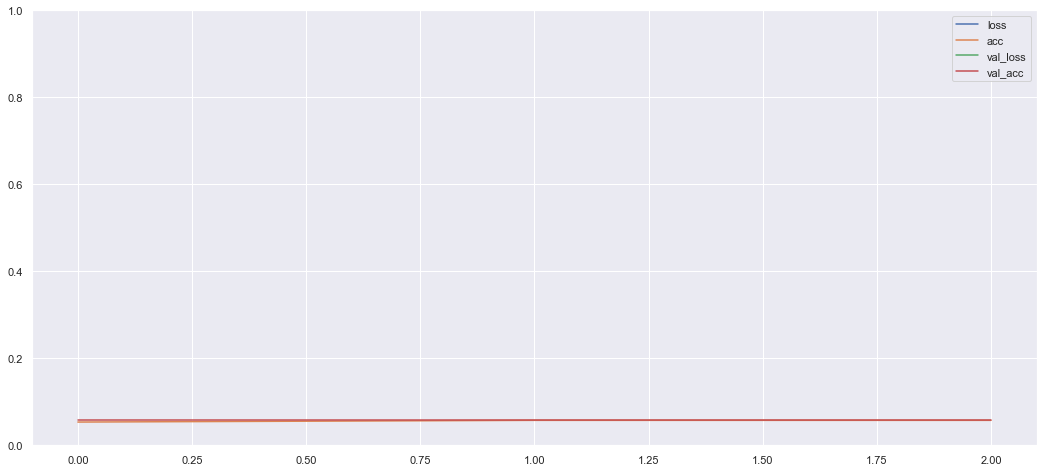

In [62]:
c=pd.DataFrame(history_r.history)

plt.plot(c)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(["loss","acc","val_loss","val_acc"])


In [63]:
y_pred =np.argmax( model.predict(x_test),axis=1)
y_pred
np.argmax(y_test,axis=1)
print('- Test set accuracy: {:.2f}%\n- Training accuracy: {:.2f}%\n- Validation accuracy: {:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred)*100,(history_r.history['accuracy'][-1])*100,(history_r.history['val_accuracy'][-1])*100))



- Test set accuracy: 5.69%
- Training accuracy: 5.74%
- Validation accuracy: 5.79%


Text(0.5, 1, 'Confusion Matrix')

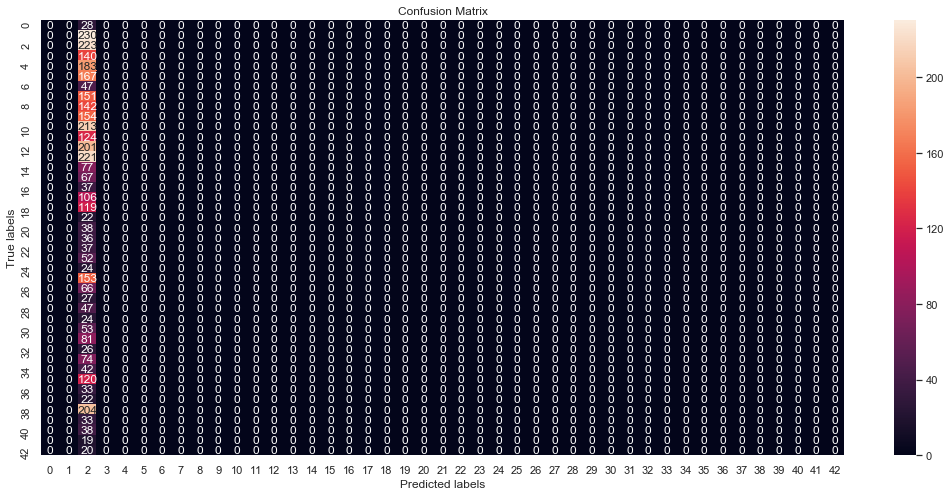

In [64]:
cm_r = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm_r, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Text(0.5, 1, 'Confusion Matrix')

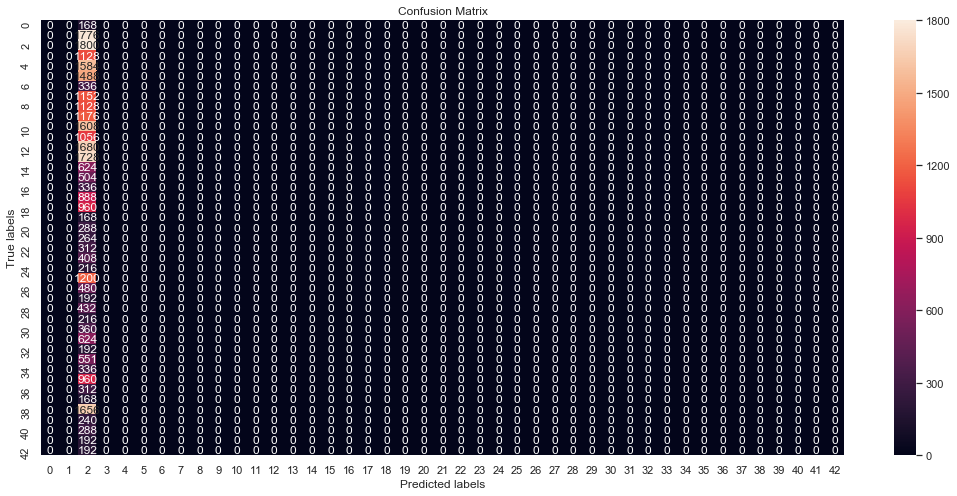

In [65]:
y_pred =np.argmax( model.predict(x_train),axis=1)
cm_r = confusion_matrix(np.argmax(y_train,axis=1), y_pred)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm_r, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')